In [11]:
import os, glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5"

In [2]:
model = load_model('./residual_class_32_bilinear_resized32_prox12.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 4)    40          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 4)    16          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 4)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [4]:
print("loading data")

abnormal = np.load('../../data/npy/abnormal_16to32.npy')
normal = np.load('../../data/npy/normal_16to32.npy')

all_len= abnormal.shape[0]+ normal.shape[0]
test_len = int((all_len)/5)
train_len = all_len - test_len

print('all_len:{}, train_len:{}, test_len:{}'.format(all_len,train_len, test_len))
img_train=np.ndarray((train_len,32,32,1), dtype=np.uint8)
img_test=np.ndarray((test_len,32,32,1), dtype=np.uint8)
lab_train=np.ndarray((train_len,1), dtype=np.uint8)
lab_test=np.ndarray((test_len,1), dtype=np.uint8)
for sp in range(0,int(all_len/2)):
    if sp<train_len/2:
        img_train[sp][:,:,:]=normal[sp][:,:,:]
        lab_train[sp]=0
        img_train[sp+int(train_len/2)][:,:,:]=abnormal[sp][:,:,:]
        lab_train[sp+int(train_len/2)]=1
        
    else:

        img_test[sp-int(train_len/2)][:,:,:]=normal[sp][:,:,:]
        lab_test[sp-int(train_len/2)]=0
        img_test[sp-int(train_len/2)+int(test_len/2)][:,:,:]=abnormal[sp][:,:,:]
        lab_test[sp-int(train_len/2)+int(test_len/2)]=1

loading data
all_len:1624, train_len:1300, test_len:324


In [14]:
test_results= model.predict(img_test, batch_size=128, verbose=1)

324/324 [==============================] - 0s 33us/step


In [15]:
binary_result=[]
for tr in range(len(test_results)):
    if test_results[tr]>0.5:
        binary_result.append(1)
    else:
        binary_result.append(0)

130 32 7 155


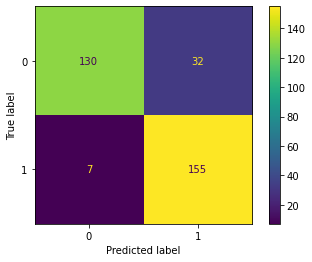

In [16]:
tn, fp, fn, tp = confusion_matrix(lab_test, binary_result).ravel()
print(tn, fp, fn, tp)
cm = confusion_matrix(lab_test, binary_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [17]:
results= pd.DataFrame(test_results)
results.to_csv('./210316/cnn+residual_probability.csv', index='cnn+residual', na_rep='NaN')